# Individual Plots of Interest

In [1]:
import numpy as np
import pandas as pd
from utils import (
    establish_s3_connection,
)
from plotting_utils import (
    plot_forecast, 
)
from s3_utils import (
    download_df_from_s3
)
import warnings

warnings.filterwarnings("ignore")
targets = pd.read_csv('aquatics-targets.csv.gz')
s3_client = establish_s3_connection()
s3_dict = {'client': s3_client, 'bucket': 'shared-neon4cast-darts'}
# Lists and dictionaries to store dataframes and 
best_performers_dfs = {}
best_models_listform = {}
target_variables = ['oxygen', 'temperature', 'chla']
model_names = [
    "BlockRNN", "Transformer", "NBEATS", 
    "TCN", "RNN", "TFT", "AutoTheta",
    "NLinear", "DLinear", "NaiveEnsemble",
]

# Read csv's and store into best_performers_df
for target_variable in target_variables:
    best_performers_dfs[target_variable] = {}
    for pos in ['inter', 'intra']:
        # Allowing ability to use remote or local
        if s3_client:
            best_performers_dfs[target_variable][pos] = download_df_from_s3(
                f'dataframes/{target_variable}_{pos}_all.csv', 
                s3_dict=s3_dict,
            )
        else:
            best_performers_dfs[target_variable][pos] = pd.read_csv(
                f'dataframes/{target_variable}_{pos}_all.csv'
            )
        if pos == 'inter':
            df = best_performers_dfs[target_variable][pos]
            best_models_listform[target_variable] = [
                [model, int(df[df['model'] == model]['model_id'].unique())] for model in model_names
            ]

/home/rstudio/.virtualenv/neon4cast-darts-ml/lib/python3.10/site-packages/statsforecast/core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
/home/rstudio/.virtualenv/neon4cast-darts-ml/lib/python3.10/site-packages/statsforecast/utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),



 Using https://minio.carlboettiger.info for data storage and access.


In [2]:
best_models_listform['oxygen']

[['BlockRNN', 3],
 ['Transformer', 1],
 ['NBEATS', 1],
 ['TCN', 0],
 ['RNN', 2],
 ['TFT', 1],
 ['AutoTheta', 0],
 ['NLinear', 0],
 ['DLinear', 1],
 ['NaiveEnsemble', 0]]

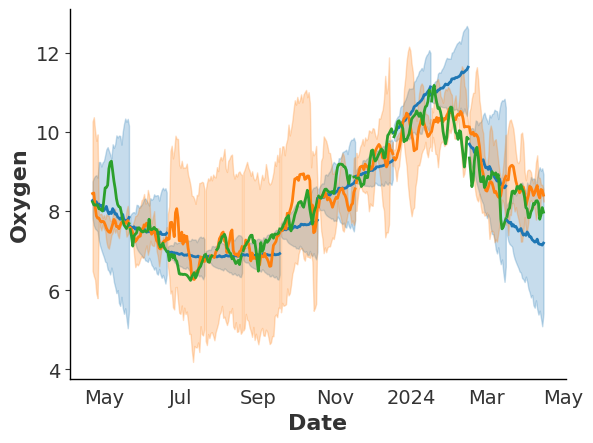

In [3]:
site_id = 'FLNT'
model = 'AutoTheta'
id_list=[0,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    plot_forecast(
        date, 
        targets, 
        site_id, 
        target_variable, 
        model, 
        id_list, 
        s3_dict=s3_dict,
        png_name='oxygen_theta'
        
    )

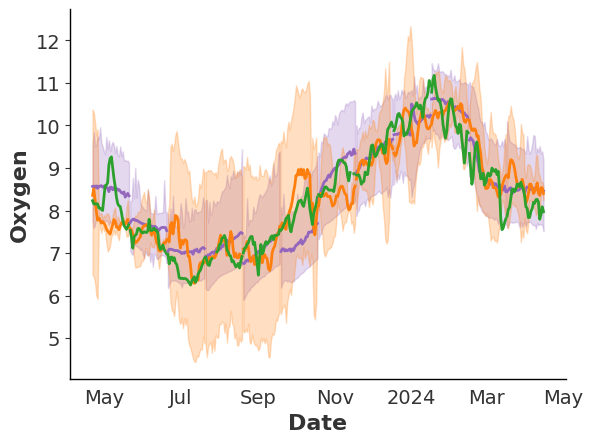

In [4]:
site_id = 'FLNT'
model = 'TFT'
id_list=[0,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    plot_forecast(
        date, 
        targets, 
        site_id, 
        target_variable, 
        model, 
        id_list, 
        s3_dict=s3_dict,
        png_name='oxygen_tft'
    )

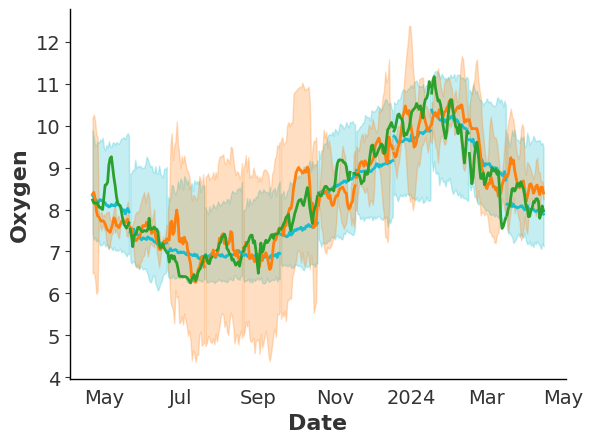

In [5]:
site_id = 'FLNT'
model = 'NaiveEnsemble'
id_list=[0,]
target_variable = 'oxygen'
dates = best_performers_dfs['oxygen']['inter']['date'].unique()

for date in dates:
    plot_forecast(
        date, 
        targets, 
        site_id, 
        target_variable, 
        model, 
        id_list, 
        s3_dict=s3_dict,
        png_name='oxygen_ensemble'
    )

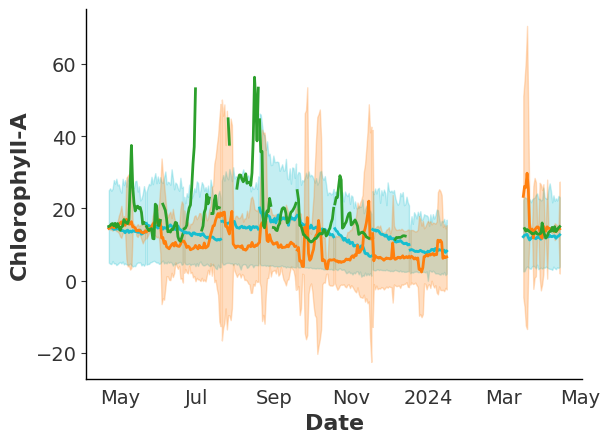

In [6]:
site_id = 'SUGG'
model = 'NaiveEnsemble'
id_list=[0,]
target_variable = 'chla'

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
            png_name='chla_ensemble'
        )
    except:
        pass

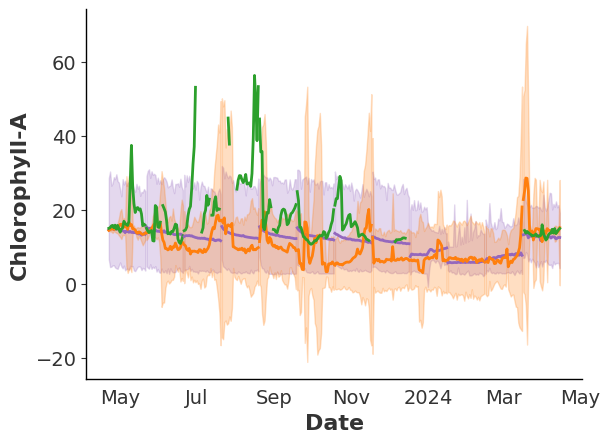

In [7]:
site_id = 'SUGG'
model = 'TFT'
id_list=[0,]
target_variable = 'chla'

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
            png_name='chla_tft'
        )
    except:
        pass

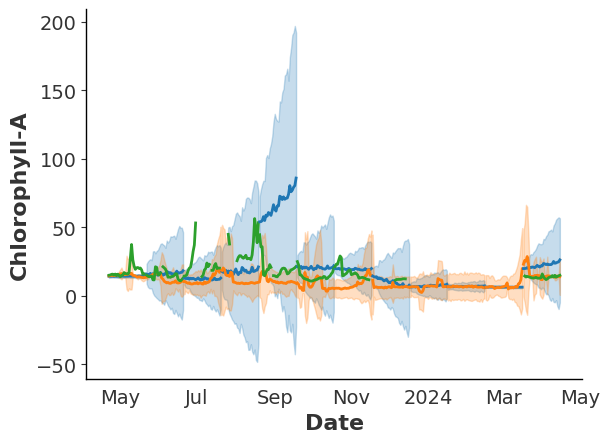

In [8]:
site_id = 'SUGG'
model = 'AutoTheta'
id_list=[0,]
target_variable = 'chla'

for date in dates:
    try:
        plot_forecast(
            date, 
            targets, 
            site_id, 
            target_variable, 
            model, 
            id_list, 
            s3_dict=s3_dict,
            png_name='chla_theta'
        )
    except:
        pass

In [9]:
import random
random.random()

0.05570276734427404